dataset: https://download.pytorch.org/tutorial/hymenoptera_data.zip

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import os
from PIL import Image
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15,15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [4]:
data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'   # 테스트를 위해, data몇개만 모아, 작은 dataset을 만듬.


data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset =  datasets.ImageFolder(data_dir, data_transforms)
class_names = train_dataset.classes
print(class_names)


dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5,shuffle=True)

['ants', 'bees']


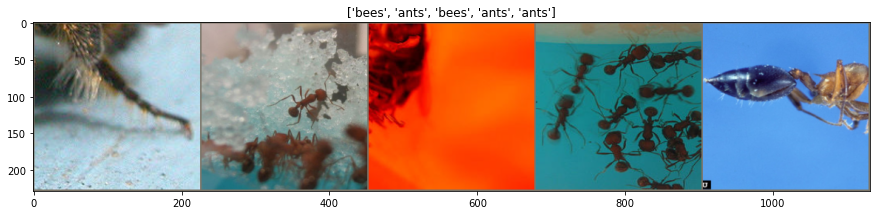

0 tensor([1, 0, 1, 0, 0])


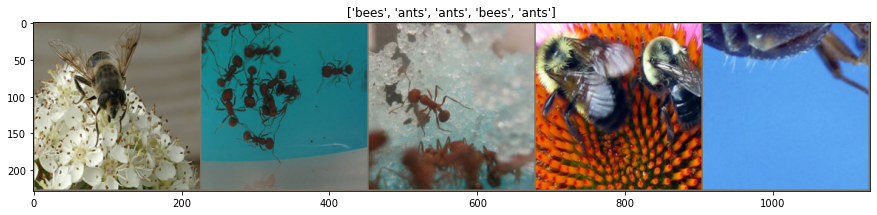

1 tensor([1, 0, 0, 1, 0])


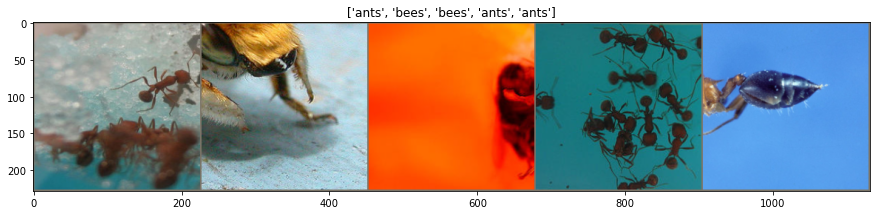

2 tensor([0, 1, 1, 0, 0])


In [35]:
for i in range(3):
    inputs, classes = next(iter(dataloader))

    out = torchvision.utils.make_grid(inputs)  # inputs: 5, 3, 224, 224  ---> out: 3, 228, 1132
    imshow(out, title=[class_names[x] for x in classes])
    print(i, classes)

In [29]:
len(dataloader)

3

## torchvision transform

In [7]:
import torchvision.transforms as transforms
from PIL import Image
import numpy as np


transform1 =transforms.RandomResizedCrop(18)
transform2 = transforms.ToTensor()  # 1. Image 또는 ndarray를 tensor로 변환. 2. HWC 또는 HW를 CHW로 만든다. 3. 정수값을 0~1 사이값으로 변환한다.
transform3 = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img = np.random.randint(0,256,size=(36,36,3)).astype(np.uint8)


a = Image.fromarray(img)  # a.size, a.height, a.width, a.mode  channel은 직접 확인 안된다.   <--- 0~255 값을 가진 uint8
print('shape of a: ', np.array(a).shape )


out1 = transform1(a) # PIL.Image.Image in PIL.Image.Image out   <--- 0~255 값을 가진 uint8


out2 = transform2(out1)  # PIL.Image.Image in torch tensor out. unit8 (HWC 또는 HW) --> CHW(0~1)  <--- 여기서, 0~1의 tensor로 변환
out3 = transform3(out2)  # (x-m)/s

print(out2.mean(axis=(1,2)))
print(out3.mean(axis=(1,2)))

print((out2.mean(axis=(1,2))- torch.tensor([0.485, 0.456, 0.406]))/torch.tensor([0.229, 0.224, 0.225]))

transform4 = transforms.Grayscale(num_output_channels=1)  
out4 = transform4(a) # return PIL.Image.Image
print(np.array(out4).shape) # num_output_channels=1 --> shape (H,W).   num_output_channels=3 --> shape(H,W,3)

shape of a:  (36, 36, 3)
tensor([0.5059, 0.4878, 0.4871])
tensor([0.0914, 0.1419, 0.3606])
tensor([0.0914, 0.1419, 0.3606])
(36, 36)


In [ ]:
out2

# tf.keras.preprocessing.image.ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'   # 테스트를 위해, data몇개만 모아, 작은 dataset을 만듬.

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
#test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=8,class_mode='categorical',shuffle=False)

print('class name: ', train_generator.class_indices)  # list(train_generator.class_indices) ==> ['ants', 'bees']

print('batch_size = ',  train_generator.batch_size, 'image shape: ', train_generator.image_shape)

Found 8 images belonging to 2 classes.
class name:  {'ants': 0, 'bees': 1}
batch_size =  8 image shape:  (150, 150, 3)


In [58]:
iterator = iter(train_generator)
x,y = iterator.next()

In [59]:
x.shape, y.shape, type(x), type(y)

((4, 150, 150, 3), (4, 2), numpy.ndarray, numpy.ndarray)

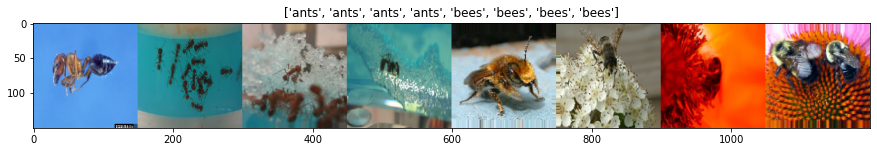

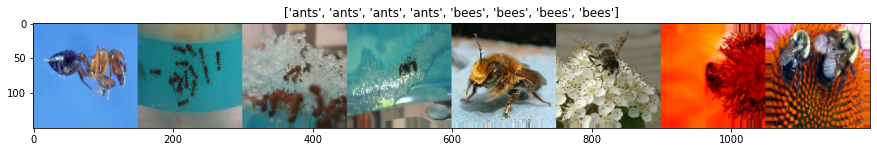

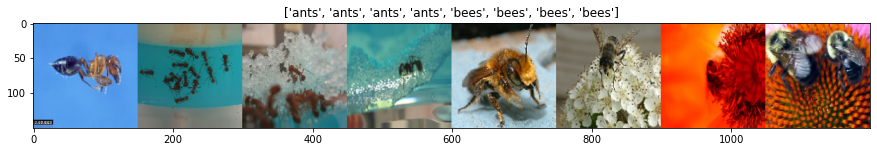

In [84]:
class_names = list(train_generator.class_indices.keys())
for i in range(3):
    inputs, classes = next(iter(train_generator))
    inputs = np.concatenate(inputs, axis=1)  # (N,150,150,3)  ==> (150,750,3)
    classes = classes.argmax(axis=-1)
    plt.figure(figsize=(15,35))
    plt.imshow(inputs)
    plt.title([class_names[x] for x in classes])
    plt.show()

In [79]:
train_generator.classes

array([0, 0, 0, 0, 1, 1, 1, 1])

In [80]:
train_generator.filenames

['ants\\0013035.jpg',
 'ants\\5650366_e22b7e1065.jpg',
 'ants\\6240329_72c01e663e.jpg',
 'ants\\6240338_93729615ec.jpg',
 'bees\\16838648_415acd9e3f.jpg',
 'bees\\17209602_fe5a5a746f.jpg',
 'bees\\21399619_3e61e5bb6f.jpg',
 'bees\\29494643_e3410f0d37.jpg']

In [82]:
list(train_generator.class_indices)

['ants', 'bees']

# fit()
- featurewise_center: fit(data)에서 channel 별로 mean을 구해서, flow data에서 평균 차감.
- samplewise_center: flow()에 넘어오는 data 각각의 자체적으로 평균 0으로 만듬.

In [88]:
# featurewise_center
X = np.random.randint(255,size=(2,4,4,3))
X_test = np.random.randint(255,size=(5,4,4,3))
datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)   # featurewise_center: 각 channel 평균

datagen.fit(X)
print('mean: ', datagen.mean, (X/255).mean(axis=(0,1,2)))


train_generator = datagen.flow(X_test, shuffle=False)  # data X_test에서 data.mean을 빼는 것 뿐.

x = next(iter(train_generator))
print("allclose: ", np.allclose(X_test/255. - datagen.mean, x,atol=1e-06))
print(np.abs((X_test/255. - datagen.mean)-x).max())

mean:  [[[0.51629907 0.49301478 0.4682599 ]]] [0.51629902 0.49301471 0.4682598 ]
allclose:  True
8.987445454522458e-08


In [91]:
# samplewise_center

X = np.random.randint(255,size=(2,4,4,3))
datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True)

train_generator = datagen.flow(X, shuffle=False)  # data X_test에서 data.mean을 빼는 것 뿐.
 
x = next(iter(train_generator))
print(f'{x.mean():.5f}')

0.00000
